## EDA

We want to take a closer look at our data to be able to better understand the difference between the two subreddits. We will be looking at the following features:

- The most common features that were used as an input into the model
- The features that the model found to be the most impactful
- Dive into the length of titles by word count and explore the length of those words
- Finally we will take a look at the sentiment analysis of text to tell us who is most expressive


In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

%matplotlib inline

    Read in the data and fix anu potential bugs

In [208]:
coefs = pd.read_csv('coef_exploration.csv')
model_inputs = pd.read_csv('model_input.csv')
original_data = pd.read_csv("reddit_data_learned.csv")

In [209]:
coefs.sort_values(by='val').head(3)

,coef,val
122,1965,-10.671927
6215,tyson,-9.620062
1873,dilation,-9.572095


In [210]:
model_inputs['is_data_beautiful'] = np.where(model_inputs['is_data_beautiful']==1,1,0)
model_inputs.head(3)

,00,000,01,05,07,08,0c,10,100,1000,...,zero,zerowaste,zeus,zip,zone,zoo,zucker,zustande,önduygu,is_data_beautiful
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [211]:
original_data.head(3)

,title,is_data_beautiful
0,[Battle] DataViz Battle for the month of Decem...,1
1,[Topic][Open] Open Discussion Monday — Anybody...,1
2,Submitted my thesis today. Here's what the chu...,1


### WordCloud Exploration - Most Impactful Features
We will explore the the features that our LogisticRegression thought to be the most impactful for TodayILearned and DataIsBeautiful subreddits.

In [212]:
# These top features predict DataIsBeautiful
disb_coefs = coefs.sort_values(by='val',ascending = False).head(10)

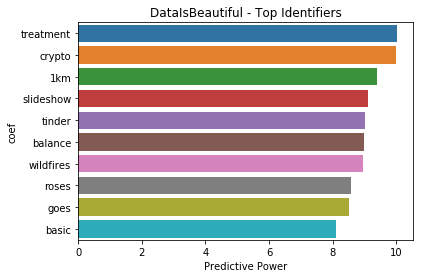

In [213]:
fig = sns.barplot(x = disb_coefs['val'], y = disb_coefs['coef'], label = 'Number of Occurances' )
fig.set_xlabel('Predictive Power')
fig.set_title('DataIsBeautiful - Top Identifiers')
plt.savefig('Images/DisB_model_coefs.png')

In [214]:
# These top features predict TodayILearned
til_coefs= coefs.sort_values(by='val').head(10)

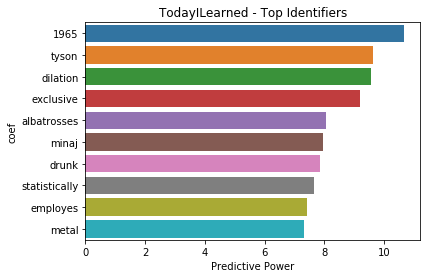

In [215]:
fig = sns.barplot(x = abs(til_coefs['val']), y = til_coefs['coef'], label = 'Number of Occurances' )
fig.set_xlabel('Predictive Power')
fig.set_title('TodayILearned - Top Identifiers')
plt.savefig('Images/TIL_model_coefs.png')

In [216]:
til_text = coefs.sort_values(by='val').head(50)
data_text = coefs.sort_values(by='val',ascending = False).head(50)

In [217]:
all_text_til = ''
for i in list(til_text['coef']):
    all_text_til += i+" "

all_text_data = ''
for i in list(data_text['coef']):
    all_text_data += i+" "

    Creating a WordCloud for DataIsBeautiful

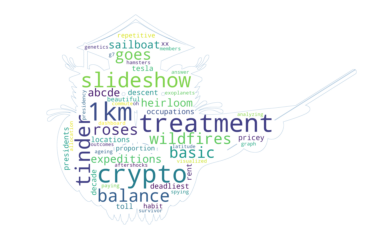

In [218]:
mask = np.array(Image.open("teach.png"))
wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white', 
                mask = mask,
                contour_width=1, 
                contour_color='steelblue',
                ).generate(all_text_data)

wordcloud.to_file('Images/data_top_features.png')

plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off");

    Creating a Wordcloud for TOdayIlearned

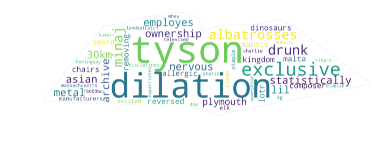

In [219]:
mask = np.array(Image.open("learn.png"))

wordc = WordCloud(width = 1200, height = 1200, 
                background_color ='white',
                mask = mask,
                contour_width=.5, 
                contour_color='steelblue',
                #min_font_size = 6
                 ).generate(all_text_til)

wordc.to_file('Images/til_top_features.png')

plt.imshow(wordc, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off");


### WordCloud Exploration - Model Inputs
Here I want to take a look at 50 most common words that are fed into the model and create a visual representation.

In [220]:

top_50_til = model_inputs.groupby('is_data_beautiful').sum().T.sort_values(0,ascending = False)[[0]].head(50)
top_10_til = model_inputs.groupby('is_data_beautiful').sum().T.sort_values(0,ascending = False)[[0]].head(10)
top_50_data = model_inputs.groupby('is_data_beautiful').sum().T.sort_values(1,ascending = False)[[1]].head(50)
top_10_data = model_inputs.groupby('is_data_beautiful').sum().T.sort_values(1,ascending = False)[[1]].head(10)

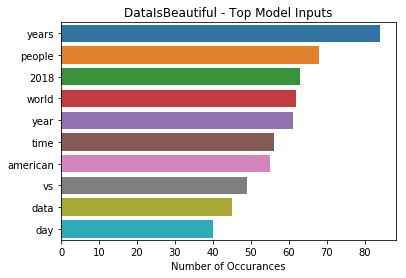

In [221]:

fig = sns.barplot(x = top_10_data[1], y = top_10_data.index, label = 'Number of Occurances' )
fig.set_xlabel('Number of Occurances')
fig.set_title('DataIsBeautiful - Top Model Inputs')
plt.savefig('Images/DisB_top_model_inputs.png')

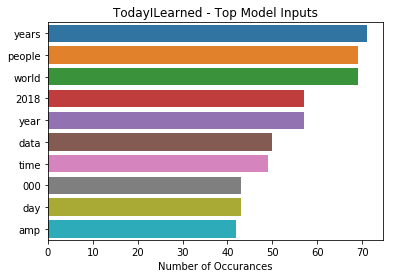

In [222]:
fig = sns.barplot(x = top_10_til[0], y = top_10_til.index )
fig.set_xlabel('Number of Occurances')
fig.set_title('TodayILearned - Top Model Inputs')
plt.savefig('Images/TIL_top_model_inputs.png');

In [223]:
data_text = ''
for i, j in enumerate(top_50_data[1]):
    temp = j * (top_50_data.index[i] + " ")
    data_text += temp


til_text = ''
for i, j in enumerate(top_50_til[0]):
    temp = j * (top_50_til.index[i] + " ")
    til_text += temp
    

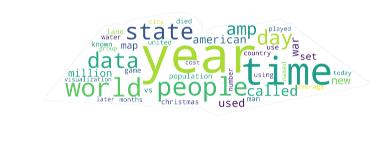

In [224]:
mask = np.array(Image.open("learn.png"))

wordc = WordCloud(width = 1200, height = 1200, 
                background_color ='white',
                mask = mask,
                contour_width=.5, 
                contour_color='steelblue',
                collocations=False
                 ).generate(til_text)

wordc.to_file('Images/til_model_input.png')

plt.imshow(wordc, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off");

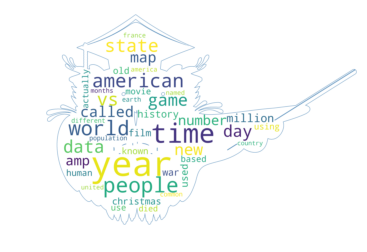

In [225]:
mask = np.array(Image.open("teach.png"))
wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white', 
                mask = mask,
                contour_width=1.5, 
                contour_color='steelblue',
                collocations=False,
                ).generate(data_text)

wordcloud.to_file('Images/data_model_input.png')

plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off");

#### Word & Title Length Exploration


In [226]:
exploration = model_inputs.groupby('is_data_beautiful').sum().T

Total Words Length

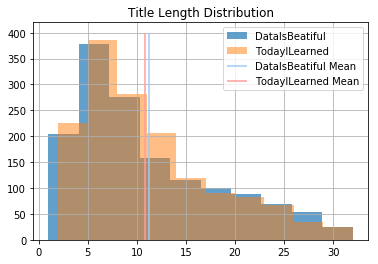

In [227]:
model_inputs[model_inputs['is_data_beautiful']==0].T.sum().hist(label = 'DataIsBeatiful',alpha = .7)
(model_inputs[model_inputs['is_data_beautiful']==1].T.sum()-1).hist(label = 'TodayILearned',alpha = .5)
plt.vlines(model_inputs[model_inputs['is_data_beautiful']==0].T.sum().mean(), ymin = 0, ymax = 400, color = 'b',label = 'DataIsBeatiful Mean')
plt.vlines((model_inputs[model_inputs['is_data_beautiful']==1].T.sum()-1).mean(), ymin = 0, ymax = 400, color = 'r', label = 'TodayILearned Mean')
plt.legend()
plt.title('Title Length Distribution')
plt.savefig('Images/title_length_distribution.png');

Data Visualization word length

In [228]:
all_til_data = model_inputs.groupby('is_data_beautiful').sum().T.sort_values(0,ascending = False)[[0]]
all_data_data = model_inputs.groupby('is_data_beautiful').sum().T.sort_values(1,ascending = False)[[1]]

In [229]:
all_text_data = []
for i, j in enumerate(all_til_data[0]):
    for num in range(j):
        all_text_data.append(len(all_til_data.index[i]))

In [230]:
all_text_data_data = []
for i, j in enumerate(all_data_data[1]):
    for num in range(j):
        if len(all_data_data.index[i]) <= 20:
            all_text_data_data.append(len(all_data_data.index[i]))

In [231]:
dataisbeauty = pd.DataFrame(all_text_data_data)

In [232]:
til = pd.DataFrame(all_text_data)
til[til[0]==45]
til = til.drop(labels = 14819)
til.max()

0    18
dtype: int64

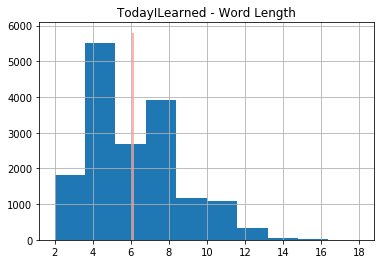

In [255]:
til.hist(label = 'TodayIlearned')
plt.title("TodayILearned - Word Length");
plt.vlines(til.mean(), ymin = 0, ymax = 5800, color = 'r')
plt.savefig('Images/til_words.png')


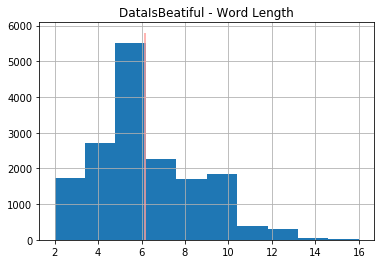

In [256]:
dataisbeauty.hist(label = 'DataIsBeatiful')
plt.vlines(dataisbeauty.mean(), ymin = 0, ymax = 5800, color = 'r')
plt.title("DataIsBeatiful - Word Length")
plt.savefig('Images/dataisbeauty_words.png')




#### Sentiment Analysis of Titles


In [236]:
sia = SentimentIntensityAnalyzer()

In [237]:
list_of_pol = [sia.polarity_scores(i) for i in original_data['title']]

In [238]:
original_data['compound'] = [i['compound'] for i in list_of_pol]
original_data['neg'] = [i['neg'] for i in list_of_pol]
original_data['neu'] = [i['neu'] for i in list_of_pol]
original_data['pos'] = [i['pos'] for i in list_of_pol]

In [239]:
original_data.head()

,title,is_data_beautiful,compound,neg,neu,pos
0,[Battle] DataViz Battle for the month of Decem...,1,-0.4588,0.2,0.800,0.000
1,[Topic][Open] Open Discussion Monday — Anybody...,1,0.3802,0.0,0.834,0.166
2,Submitted my thesis today. Here's what the chu...,1,0.0000,0.0,1.000,0.000
3,"Entire text history with my GF, from first swi...",1,0.0000,0.0,1.000,0.000
4,100 hours of dataisbeautiful posts [OC],1,0.0000,0.0,1.000,0.000


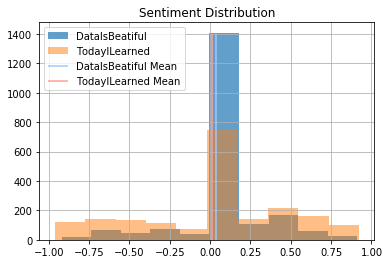

In [240]:
original_data[original_data['is_data_beautiful']==1]['compound'].hist(label = 'DataIsBeatiful',alpha = .7)
original_data[original_data['is_data_beautiful']==0]['compound'].hist(label = 'TodayILearned',alpha = .5)
plt.vlines(original_data[original_data['is_data_beautiful']==1]['compound'].mean(), ymin = 0, ymax = 1400, color = 'b',label = 'DataIsBeatiful Mean')
plt.vlines(original_data[original_data['is_data_beautiful']==0]['compound'].mean(), ymin = 0, ymax = 1400, color = 'r', label = 'TodayILearned Mean')

plt.title('Sentiment Distribution')
plt.legend()
plt.savefig('Images/Sentiment_distribution.png');